<a href="https://colab.research.google.com/github/LCaravaggio/ML_conPython/blob/main/Titanic_Imputaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# 2. Cargar dataset Titanic desde internet

In [3]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 3. Exploración inicial

In [6]:
print("Primeras filas:")
df.head()

Primeras filas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Categorías de Embarked:

S (Southampton): la mayoría embarcó aquí (puerto principal de salida).

C (Cherbourg): puerto en la costa norte de Francia.

Q (Queenstown): hoy Cobh, en Irlanda, última escala antes del Atlántico.

In [5]:
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# 4. Detectar outliers simples en 'Age' con boxplot

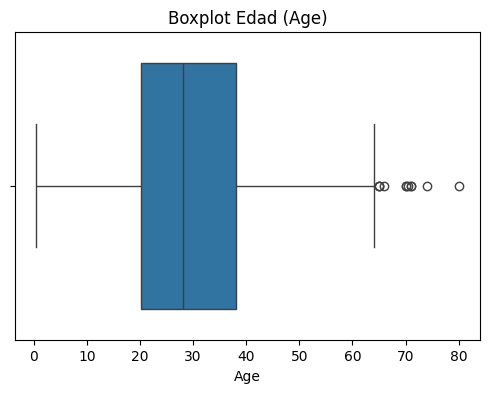

In [8]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot Edad (Age)')
plt.show()

# 5. Imputaciones

In [10]:
## 5.1 Imputación numérica con media
imputer_media = SimpleImputer(strategy='mean')
df['Age_media'] = imputer_media.fit_transform(df[['Age']])

## 5.2 Imputación numérica con mediana
imputer_mediana = SimpleImputer(strategy='median')
df['Age_mediana'] = imputer_mediana.fit_transform(df[['Age']])

## 5.3 Imputación categórica con la moda (Embarked)
imputer_moda = SimpleImputer(strategy='most_frequent')
df['Embarked_imputado'] = imputer_moda.fit_transform(df[['Embarked']]).ravel()

print("\nValores faltantes después de imputación:")
print(df[['Age_media','Age_mediana','Embarked_imputado']].isnull().sum())


Valores faltantes después de imputación:
Age_media            0
Age_mediana          0
Embarked_imputado    0
dtype: int64


 # 6. Encodeo de variables categóricas

In [12]:
## 6.1 Label Encoding (para variable binaria como 'Sex')
label_encoder = LabelEncoder()
df['Sex_label'] = label_encoder.fit_transform(df['Sex'])

## 6.2 One-Hot Encoding (para variable multicategoría como 'Embarked')
# Primero imputamos Embarked para no tener NaNs
df['Embarked'] = imputer_moda.fit_transform(df[['Embarked']]).ravel()
onehot_encoder = OneHotEncoder(sparse_output=False)
embarked_encoded = onehot_encoder.fit_transform(df[['Embarked']])

In [14]:
# Crear DataFrame con columnas dummy
embarked_df = pd.DataFrame(embarked_encoded,
                           columns=onehot_encoder.get_feature_names_out(['Embarked']))

# Concatenar al dataset original
df = pd.concat([df, embarked_df], axis=1)

In [15]:
print("\nColumnas después del encodeo:")
print(df.columns)


Columnas después del encodeo:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_media',
       'Age_mediana', 'Embarked_imputado', 'Sex_label', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


# 7. Visualizar imputaciones comparando distribuciones

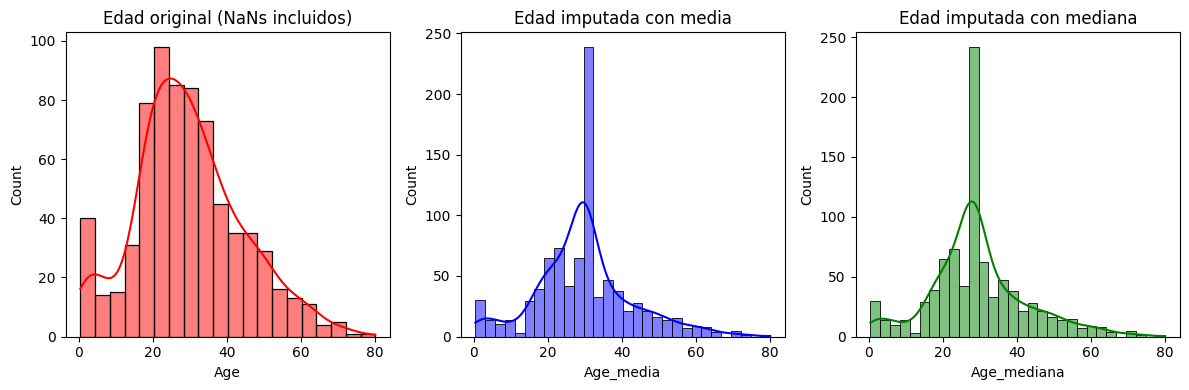

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='red')
plt.title('Edad original (NaNs incluidos)')

plt.subplot(1, 3, 2)
sns.histplot(df['Age_media'], kde=True, color='blue')
plt.title('Edad imputada con media')

plt.subplot(1, 3, 3)
sns.histplot(df['Age_mediana'], kde=True, color='green')
plt.title('Edad imputada con mediana')

plt.tight_layout()
plt.show()

# 8. Outliers: ejemplo de recorte (winsorizing simple)

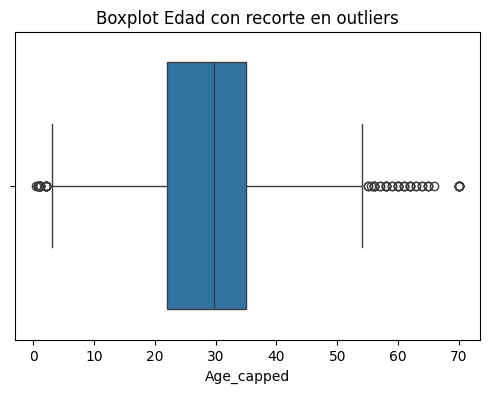

In [17]:
# Reemplazamos valores de Age > 70 por 70 para ilustrar
df['Age_capped'] = np.where(df['Age_media'] > 70, 70, df['Age_media'])

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age_capped'])
plt.title('Boxplot Edad con recorte en outliers')
plt.show()